# REGRESI SEDERHANA

In [1]:
# menghubungkan colab dengan gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# memanggil data set lewat gdrive
path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Praktikum03"

In [5]:
# membaca file csv menggunakan pandas
import pandas as pd

# buat datagrame read data
df = pd.read_csv(path + '/Data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [8]:
# mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [6]:
# menghitung statistik deskriptif pada kolom numerik dengan describe
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


# Konversi data menjadi satuan CM dan KG

In [7]:
# data pre-processing
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(tinggi_cm=lambda x: x["tinggi_cm"] * 2.54,
            berat_kg=lambda x: x["berat_kg"] * 0.453592)
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


# Split Data Training 80% dan Data Testing 20%

In [10]:
# membagi dataset untuk training dan test
from sklearn.model_selection import train_test_split

# variabel independent/bebas/fitur
X = df1[["tinggi_cm"]]
# variabel dependent/terikat/target
y = df1["berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# cetak data training X
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


# Pemodelan Data : dengan Data Training

In [11]:
# Training Model
from sklearn.linear_model import LinearRegression

# membuat objek model instan dari class LinearRegression
model = LinearRegression()

# melakukan proses training/melatih model dengan data training
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Evaluasi Model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisian (kg per cm):", model.coef_[0])
print("Intersep (kg):", model.intercept_)
print("R2 (test):", r2)
print("MAE (kg):", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):", rmse)

Koefisian (kg per cm): 0.5518217971118468
Intersep (kg): -37.656882325081
R2 (test): 0.24989238901493693
MAE (kg): 3.6704108331736673
RMSE (kg): 4.60900592355825


In [15]:
# Evaluasi Model
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prediksi model dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd. DataFrame()
df_resume['R2']=r2
df_resume['Koefisien (Kg/cm)']=model.coef_[0]
df_resume['Intersep (Kg)']=model.intercept_
df_resume['MAE (Kg)']=mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
df_resume['MSE (Kg)']=mse
df_resume['RMSE (Kg)']=rmse
df_resume

,R2,Koefisien (Kg/cm),Intersep (Kg),MAE (Kg),MSE (Kg),RMSE (Kg)


# Cetak Persamaan Regresi

In [16]:
# persamaan regresi
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan : y = {slope:.3f} * x + {intercept:.3f}")

Persamaan : y = 0.552 * x + -37.657


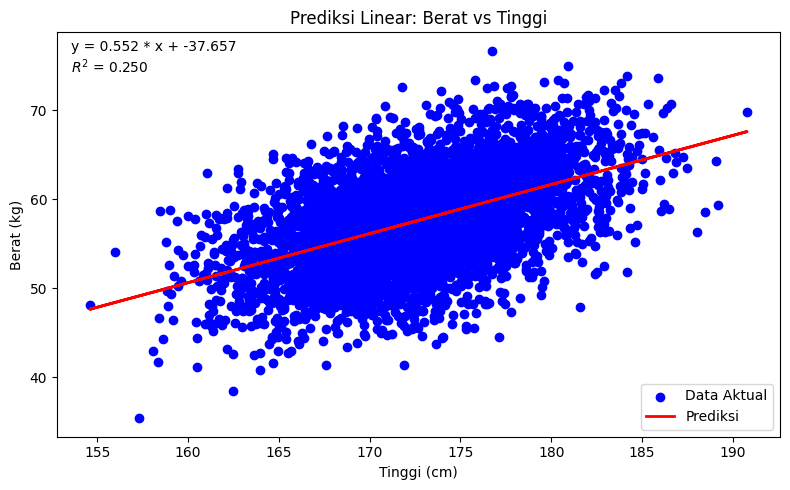

In [20]:
# plot regresi
import matplotlib.pyplot as plt

# plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
# garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Prediksi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import numpy as np

# Prediksi
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih Error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per baris (100 * (1 - |error|/aktual)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan hasil
hasil


,Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih Error (kg),Akurasi (%)
0,174.73,50.16,58.762940,8.602940,82.849003
1,171.31,50.33,56.875710,6.545710,86.994417
2,169.29,58.22,55.761030,-2.458970,95.776417
3,163.30,58.92,52.455617,-6.464383,89.028542
4,170.52,63.06,56.439771,-6.620229,89.501698
...,...,...,...,...,...
4995,178.75,56.59,60.981264,4.391264,92.240212
4996,163.05,47.45,52.317662,4.867662,89.741493
4997,166.51,52.46,54.226965,1.766965,96.631786
4998,167.70,49.90,54.883633,4.983633,90.012759


# Data Testing dari Mahasiswa TI 2022

In [27]:
# Ubah data Excel jadi dataset CSV
import pandas as pd

# 1. Baca file Excel
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Praktikum03/Data/berat_ti2022.xlsx")

# 2. Simpan jadi file CSV
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Praktikum03/Data/berat_ti2022.csv", index=False)


In [39]:
df_ti2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Praktikum03/Data/berat_ti2022.csv", sep=",")
df_ti2022

,no,nama,tinggi_cm,actual_berat_kg
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


In [40]:
# ambil X_testing
X_testing = df_ti2022[["tinggi_cm"]]
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [41]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Praktikum03/Data/berat_ti2022.csv", sep=",")

y_pred = model.predict(data[['tinggi_cm']])
data['prediksi_kg']=y_pred
data

,no,nama,tinggi_cm,actual_berat_kg,prediksi_kg
0,1,Rafa,168,58.5,55.049180
1,2,Tiara,162,78.2,51.738249
2,3,Tia,155,52.7,47.875496
3,4,Keyla,160,70.3,50.634605
4,5,Bani,183,65.8,63.326507


In [38]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Praktikum03/Data/berat_ti2022.csv", sep=",")

y_pred = model.predict(data[['tinggi_cm']])
data['prediksi_kg']=y_pred
data["Selisih error (kg)"] = data["prediksi_kg"] - data["actual_berat_kg"]
denom = data["actual_berat_kg"].replace(0, np.nan)
data["Akurasi (%)"] = (1 - (data["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data

,no,nama,tinggi_cm,actual_berat_kg,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Rafa,168,58.5,55.049180,-3.450820,94.101162
1,2,Tiara,162,78.2,51.738249,-26.461751,66.161443
2,3,Tia,155,52.7,47.875496,-4.824504,90.845344
3,4,Keyla,160,70.3,50.634605,-19.665395,72.026465
4,5,Bani,183,65.8,63.326507,-2.473493,96.240891


In [43]:
data.describe()

,no,tinggi_cm,actual_berat_kg,prediksi_kg
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,165.600000,65.100000,53.724807
std,1.581139,10.784248,9.955652,5.950983
min,1.000000,155.000000,52.700000,47.875496
25%,2.000000,160.000000,58.500000,50.634605
50%,3.000000,162.000000,65.800000,51.738249
75%,4.000000,168.000000,70.300000,55.049180
max,5.000000,183.000000,78.200000,63.326507


# MULTIPLE LINEAR REGRESI

In [45]:
import pandas as pd

# Baca file CSV
df = pd.read_csv(path + '/Data/stunting_wasting_dataset.csv', sep=',')

# cetak 5 baris data dari file
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [46]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [47]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"JK", "Umur (bulan)":"umur_bln",
                        "Tinggi Badan (cm)":"tinggi_cm", "Berat Badan (kg)":"berat_kg"}).copy())
# Laki-laki: 1, Perempuan:0
df1["JK"] = df1["JK"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,JK,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [48]:
# hitung matriks korelasi
corr_matrix = df1.corr()
print(corr_matrix)

           berat_kg        JK  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
JK         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


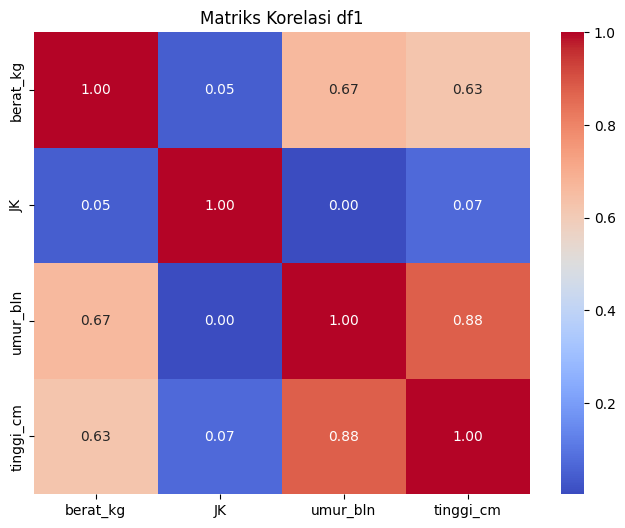

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

#Misalkan target (Y) adalah berat badan, # Variabel Dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bln", "tinggi_cm"]]

#Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# cetak pembagian data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

# cek apakah sudah ada constanta ada data training
X_train.head()

Jumlah data train : 80000
Jumlah data test : 20000


,umur_bln,tinggi_cm
91526,4,59.7
19416,22,82.4
99079,3,60.4
45086,22,77.3
54659,24,87.6


In [52]:
import statsmodels.api as sm
# tambahkan konstanta
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
91526,1.0,4,59.7
19416,1.0,22,82.4
99079,1.0,3,60.4
45086,1.0,22,77.3
54659,1.0,24,87.6


In [53]:
import statsmodels.api as sm

#Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f} * x1 + {x2_tinggi:.3f} * x2 ")

-----------------------------
const        2.545992
umur_bln     0.230701
tinggi_cm    0.053981
dtype: float64
-----------------------------
y = 2.546 + 0.231 * x1 + 0.054 * x2 


In [54]:
# Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 3.289e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        03:31:39   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5460      0.091     28.049      0.0

In [56]:
# tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih Error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per baris (100 * (1 - |error|/aktual)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan hasil akhir
hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih Error (kg),Akurasi (%)
33909,6,63.4,5.9,7.352584,1.452584,75.379926
92307,1,48.3,1.9,5.383969,3.483969,0.000000
89107,7,66.8,10.4,7.766820,-2.633180,74.680963
9538,6,67.2,5.2,7.557712,2.357712,54.659392
31008,16,70.8,9.8,10.059052,0.259052,97.356612
...,...,...,...,...,...,...
34823,10,79.2,9.4,9.128286,-0.271714,97.109421
78045,23,77.5,10.2,12.035630,1.835630,82.003625
73770,12,82.0,10.9,9.740834,-1.159166,89.365448
78950,2,56.7,5.4,6.068109,0.668109,87.627613
